## Simple convex QSS problem

In [ ]:
import cvxpy as cvx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import random
from gfosd import Problem
from gfosd.components import *

## Data generation

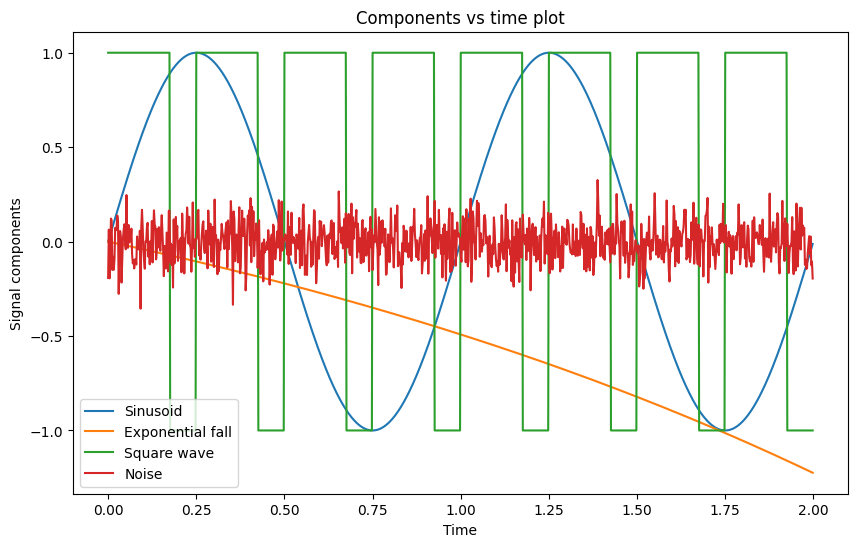

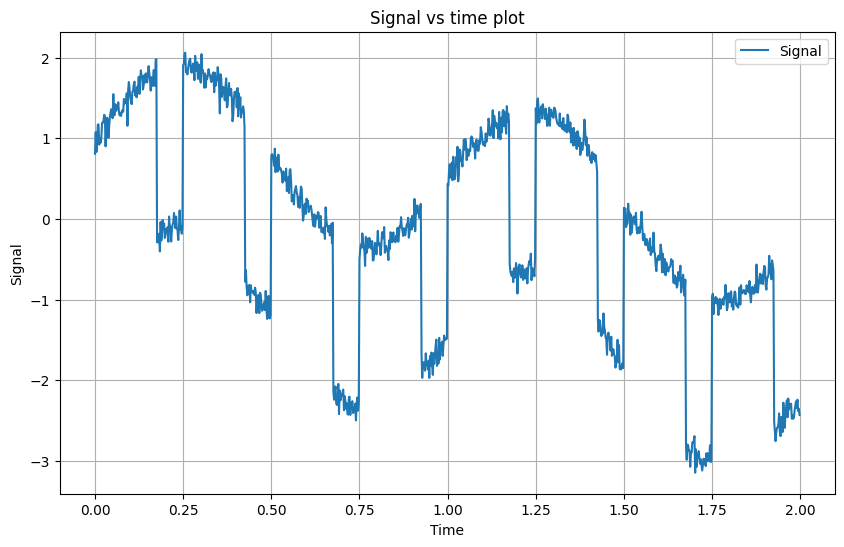

In [ ]:
a1 = 1
a2 = 1
a3 = 1
sigma = 0.1

f_1 = 1
f_2 = 5
f_sq = 4
alpha = 0.4

N = 1000
inds = [x for x in range(N)]

t = np.linspace(0,2,N+1)
t = t[:-1]
ts = t[1]-t[0]
fs = 1/ts

x1 = a1*np.sin(2*np.pi*f_1*t)
x2 = a2*(1-np.exp(alpha*t))
x3 = a3*sp.signal.square(2*np.pi*f_sq*t, duty=0.7)
noise = sigma*np.random.randn(N)

x = np.zeros([4,N])
x[0,:] = noise
x[1,:] = x1
x[2,:] = x2
x[3,:] = x3

y = np.sum(x, axis=0)
y_noiseless = y-noise

plt.figure(figsize=(10, 6))
plt.plot(t, x1, label='Sinusoid')
plt.plot(t, x2, label='Exponential fall')
plt.plot(t, x3, label='Square wave')
plt.plot(t, noise, label='Noise')
plt.xlabel('Time')
plt.ylabel('Signal components')
plt.title('Components vs time plot')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Signal')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Signal vs time plot')
plt.legend()
plt.grid()
plt.show()

## Training set fraction vs Construction error

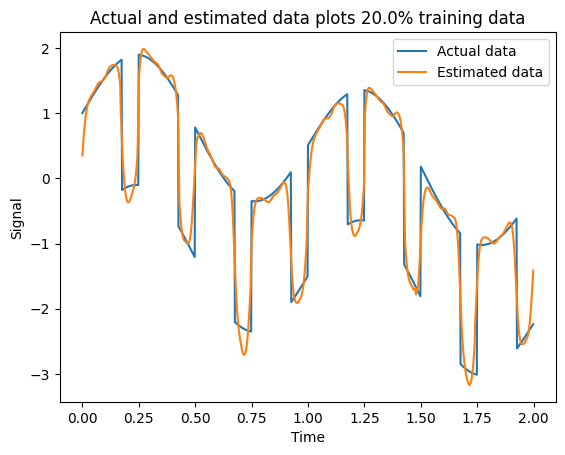

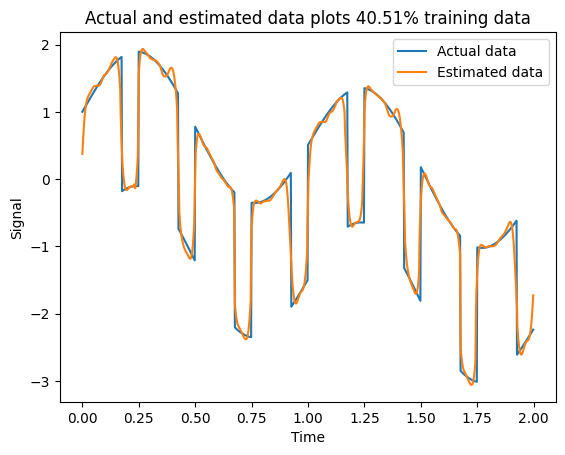

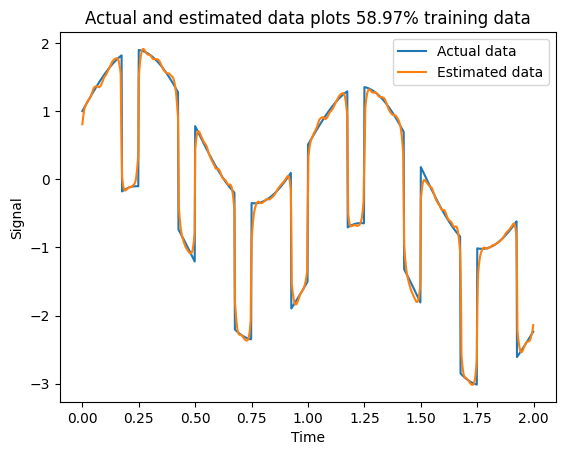

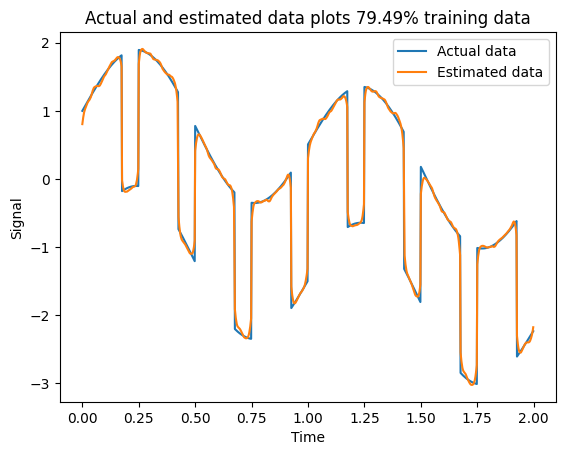

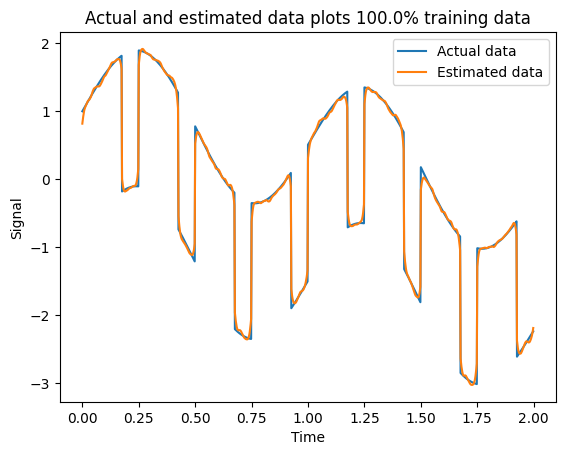

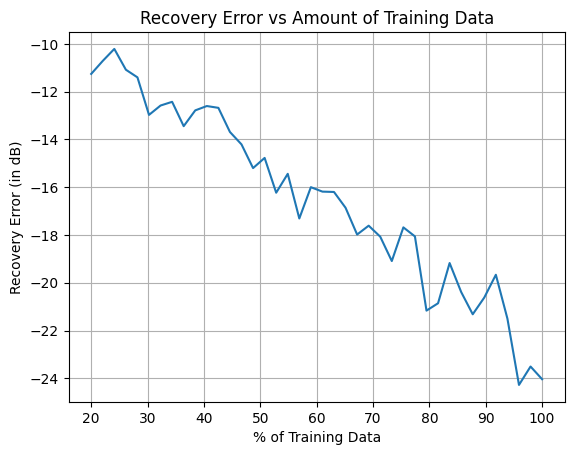

In [ ]:
L = 40
train_fracs = np.linspace(0.2, 1, L)
recons_errors = np.zeros(L)

for frac_ind in range(L):
    train_frac = train_fracs[frac_ind]
    test_frac = 1 - train_frac
    test_num = int(N*test_frac)

    test_inds = random.sample(inds, test_num)
    y_missing = y.copy()
    y_missing[test_inds] = np.NaN*np.ones(test_num)

    c0 = SumSquare(weight=1/N)
    c1 = Aggregate([
        SumSquare(weight=75/N, diff=2),
        Periodic(T=N, period=np.round(fs/f_1))
    ])
    c2 = Aggregate([
        SumSquare(weight=75/N, diff=1),
    ])
    c3 = Aggregate([
        SumAbs(weight=1/N, diff=1),
        Inequality(vmax=a3, vmin=-a3),
    ])

    components = [c0, c1, c2, c3]
    problem = Problem(y_missing, components)

    y_cons = problem.decompose(verbose=False)
    y_cons = np.sum(y_cons[1:], axis=0)

    if frac_ind==0:
        plt.figure(1)
        plt.plot(t, y_noiseless, label='Actual data')
        plt.plot(t, y_cons, label='Estimated data')
        plt.xlabel('Time')
        plt.ylabel('Signal')
        plt.title('Actual and estimated data plots ' + str(round(100*train_frac,2)) + '% training data')
        plt.legend()
        plt.show()
    elif frac_ind==L/4:
        plt.figure(2)
        plt.plot(t, y_noiseless, label='Actual data')
        plt.plot(t, y_cons, label='Estimated data')
        plt.xlabel('Time')
        plt.ylabel('Signal')
        plt.title('Actual and estimated data plots ' + str(round(100*train_frac,2)) + '% training data')
        plt.legend()
        plt.show()
    elif frac_ind==(2*L/4)-1:
        plt.figure(3)
        plt.plot(t, y_noiseless, label='Actual data')
        plt.plot(t, y_cons, label='Estimated data')
        plt.xlabel('Time')
        plt.ylabel('Signal')
        plt.title('Actual and estimated data plots ' + str(round(100*train_frac,2)) + '% training data')
        plt.legend()
        plt.show()
    elif frac_ind==(3*L/4)-1:
        plt.figure(3)
        plt.plot(t, y_noiseless, label='Actual data')
        plt.plot(t, y_cons, label='Estimated data')
        plt.xlabel('Time')
        plt.ylabel('Signal')
        plt.title('Actual and estimated data plots ' + str(round(100*train_frac,2)) + '% training data')
        plt.legend()
        plt.show()
    elif frac_ind==L-1:
        plt.figure(3)
        plt.plot(t, y_noiseless, label='Actual data')
        plt.plot(t, y_cons, label='Estimated data')
        plt.xlabel('Time')
        plt.ylabel('Signal')
        plt.title('Actual and estimated data plots ' + str(round(100*train_frac,2)) + '% training data')
        plt.legend()
        plt.show()

    recons_errors[frac_ind] = np.mean(np.square(np.abs(y_noiseless-y_cons)))

plt.figure(6)
plt.plot(train_fracs*100, 10*np.log10(recons_errors))
plt.title('Recovery Error vs Amount of Training Data')
plt.xlabel('% of Training Data')
plt.ylabel('Recovery Error (in dB)')
plt.grid()
plt.show()